Otsu's binarization


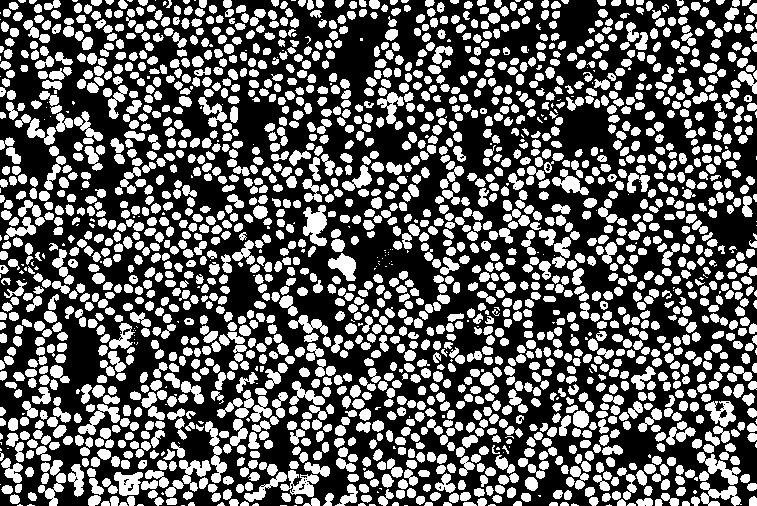

Remoção de ruído:


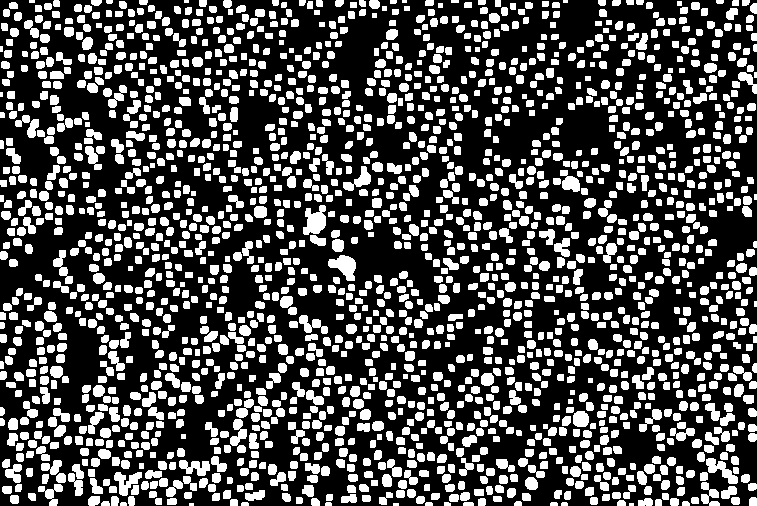

Dilatação das áreas:


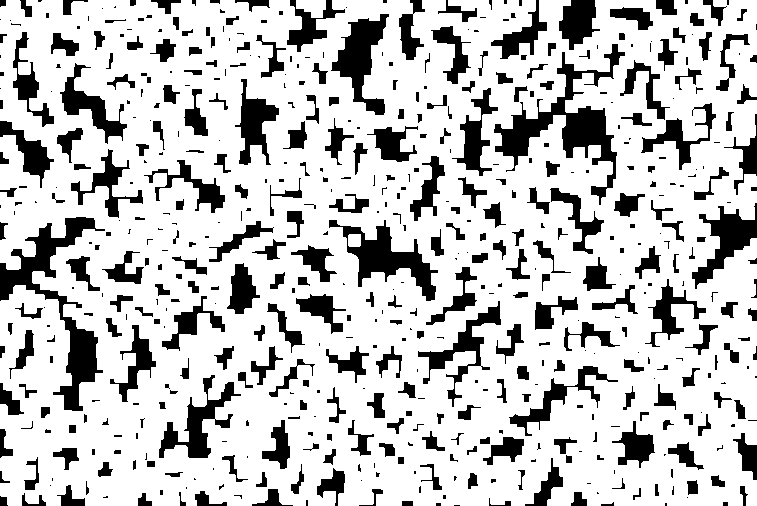

Contração das áreas:


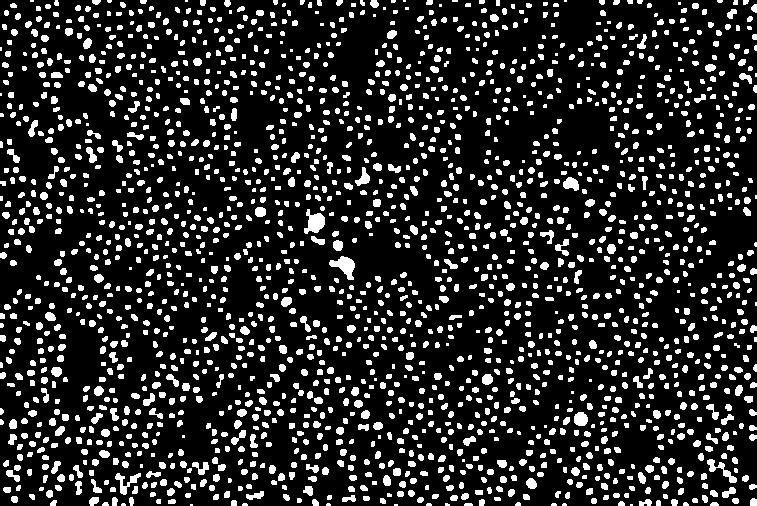

Detecção de bordas:


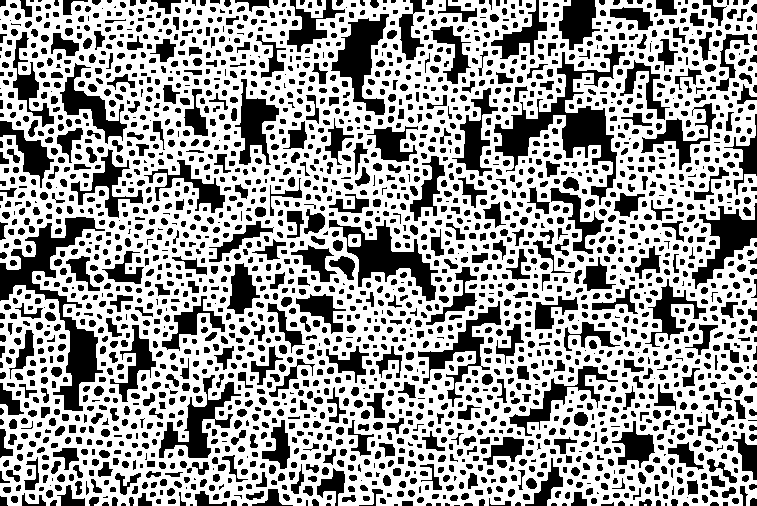

Quantidade de objetos: 2097


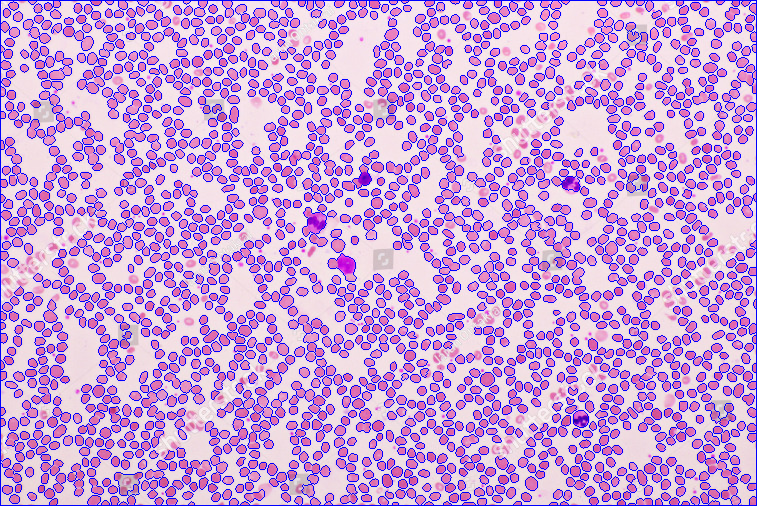

In [36]:
# Importando as bibliotecas
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def watershedCounter( url, threshold ):
    # Lendo a imagem
    img = cv.imread(url)
    if( img.any() == None ):
        print("Imagem não pode ser lida")

    # Convertendo pra escala de cinza
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Este algoritmo permite dividir a imagem em duas: frente (foreground) e fundo (background).
    # Para conseguir isto, ele se baseia na escala de cinza da imagem que foi o passo anterior.
    # Fonte: https://www.baeldung.com/cs/otsu-segmentation
    ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    print("Otsu's binarization")
    cv2_imshow(thresh)

    # Remoção de ruído
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
    print("Remoção de ruído:")
    cv2_imshow(opening)

    # sure background area
    sure_bg = cv.dilate(opening,kernel,iterations=3)

    print("Dilatação das áreas:")
    cv2_imshow(sure_bg)

    # Aplica um algoritmo de erosão, a fim de conseguir encontrar os pontos centrais
    # Isto pode ser visto como uma contração das áreas a serem separadas.
    # Estes parâmetros devem ser modificados para cada imagem diferente.
    # Para objetos maiores (ex: moedas), o ideal é multiplicar por valores mais próximos de 1
    # Já para menores (ex: células), um valor próximo do 0 é o ideal.
    dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
    ret, sure_fg = cv.threshold(dist_transform,threshold*dist_transform.max(),255,0)
    print("Contração das áreas:")
    cv2_imshow(sure_fg)

    # Detecção de bordas
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg,sure_fg)
    print("Detecção de bordas:")
    cv2_imshow(unknown)

    # Cria-se uma array para marcar as áreas
    ret, markers = cv.connectedComponents(sure_fg)
    # Toda área que não sabemos se é ou não um objeto contável, marcamos com um número diferente de 0
    markers = markers+1
    # Marcar o background como 0 (não contá-lo)
    markers[unknown==255] = 0

    # Aplicando o algoritmo watershed, marcando as bordas como -1.
    markers = cv.watershed(img,markers)
    img[markers == -1] = [255,0,0]

    # Podemos ver a quantidade de objetos através do retorno da marcação das áreas.
    # Já para visualizar estas áreas, usamos a imagem retornada pelo algoritmo Watershed.
    # ret - 1 é usado pois ret contém a área do background, por isso devemos tirá-la do resultado.
    print("Quantidade de objetos:", ret - 1)
    cv2_imshow(img)

watershedCounter("cells2.jpg", 0.2)

Otsu's binarization


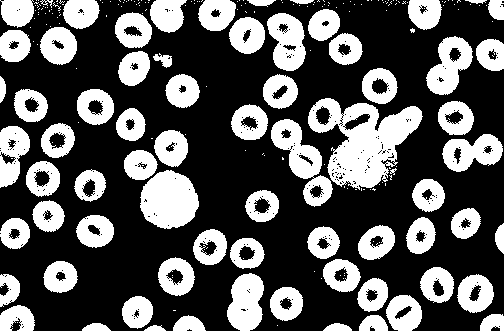

Remoção de ruído:


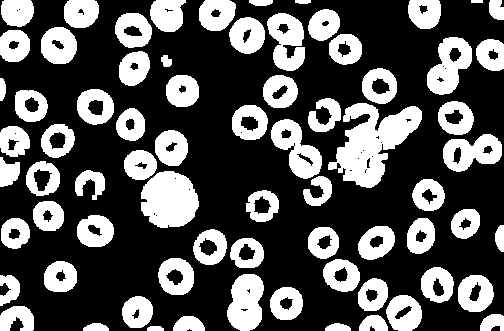

Dilatação das áreas:


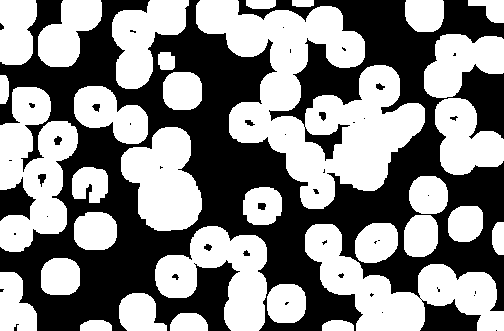

Contração das áreas:


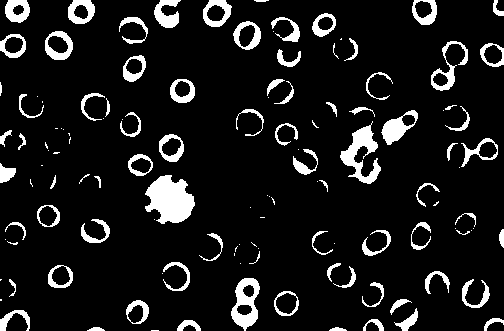

Detecção de bordas:


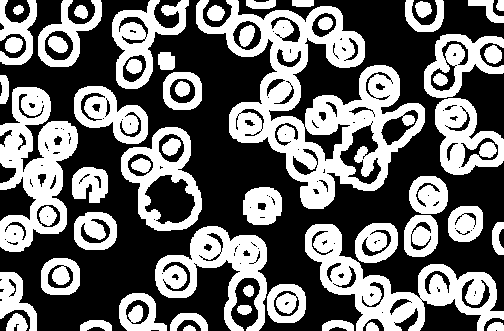

Quantidade de objetos: 125


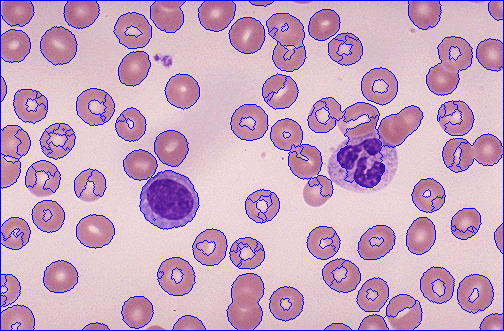

In [37]:
watershedCounter("cells1.jpg", 0.2)

Otsu's binarization


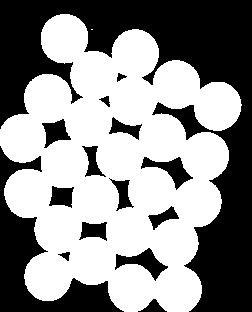

Remoção de ruído:


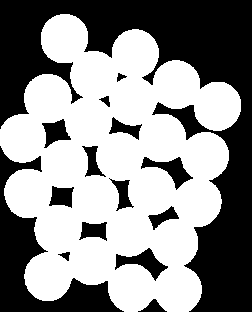

Dilatação das áreas:


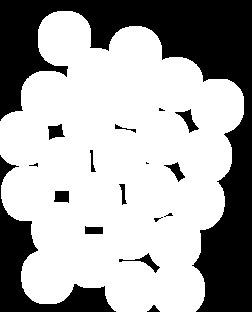

Contração das áreas:


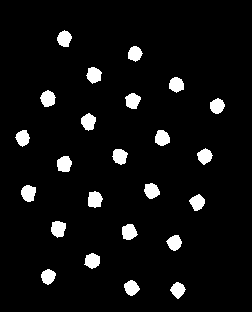

Detecção de bordas:


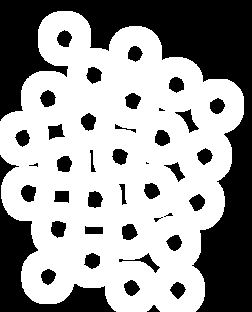

Quantidade de objetos: 24


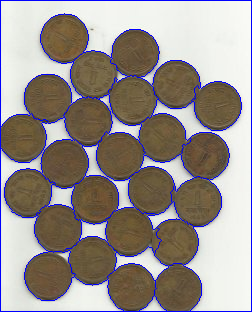

In [38]:
watershedCounter("coins.jpg", 0.7)